In [77]:
# Task 1
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
def age_group(age: int):
    if age == 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    return None

data = pd.read_csv("dateset/nyt/nyt1.csv")
data_check = data[data.Age > 0]
data_check.insert(1, "AG", [age_group(age) for age in data_check.Age.to_list()])
data_gender = data_check.groupby(["AG", "Gender"],as_index=False).sum()
data_signed_in = data_check.groupby(["AG"],as_index=False).sum()

,AG,Age,Gender,Impressions,Clicks,Signed_In
0,18,97632,2892,27001,458,5424
1,18-24,750159,18829,176584,1709,35270
2,25-34,1716328,30958,290511,2937,58174
3,35-44,2798593,37676,355824,3662,70860
4,45-54,3181779,34007,322109,3232,64288
5,55-64,2661830,23988,224688,4556,44738
6,65+,2098644,10445,144120,4350,28753


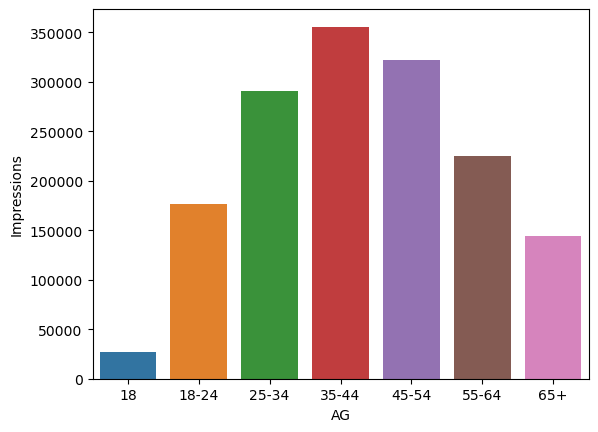

In [78]:
# Task 2.1
sns.barplot(data=data_signed_in, 
            x=data_signed_in.AG, 
            y=data_signed_in.Impressions)
data_signed_in.sort_values(["AG"])

,AG,Gender,Age,Impressions,Clicks,Signed_In
0,18,0,45576,12683,205,2532
1,18,1,52056,14318,253,2892
2,18-24,0,349689,82374,797,16441
3,18-24,1,400470,94210,912,18829
4,25-34,0,802877,136292,1388,27216
5,25-34,1,913451,154219,1549,30958
6,35-44,0,1310798,166324,1707,33184
7,35-44,1,1487795,189500,1955,37676
8,45-54,0,1498737,151650,1542,30281
9,45-54,1,1683042,170459,1690,34007


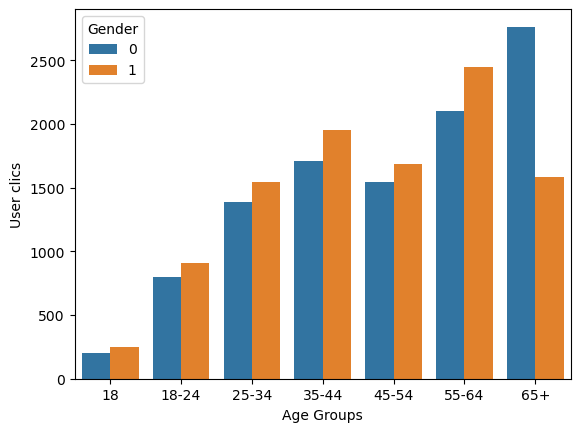

In [79]:
# Task 2.2
ax=sns.barplot(data=data_gender, 
            x=data_gender.AG, 
            y=data_gender.Clicks,
            hue=data_gender.Gender)
ax.set(xlabel='Age Groups',ylabel='User clics')
data_gender.sort_values(["AG"])

[4.978060471976401,
 5.006634533597959,
 4.993828858252828,
 5.021507197290432,
 5.010406296665008,
 5.022307657919442,
 5.012346537752582]

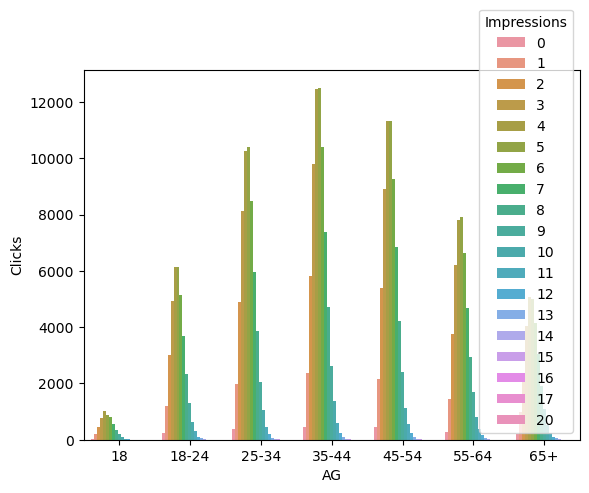

In [82]:
data_by_impression_age = data_check.groupby(["AG", "Impressions"],as_index=False).count()
sns.barplot(data=data_by_impression_age, 
            x=data_by_impression_age.AG, 
            y=data_by_impression_age.Clicks,
            hue=data_by_impression_age.Impressions)
Age_valueGroup=["18","18-24","25-34","35-44","45-54","55-64","65+"]
[data_check[data_check.AG==value].Impressions.mean() for value in Age_valueGroup]

[0    4
 Name: Impressions, dtype: int64,
 0    5
 Name: Impressions, dtype: int64,
 0    5
 Name: Impressions, dtype: int64,
 0    5
 Name: Impressions, dtype: int64,
 0    5
 Name: Impressions, dtype: int64,
 0    5
 Name: Impressions, dtype: int64,
 0    4
 Name: Impressions, dtype: int64]

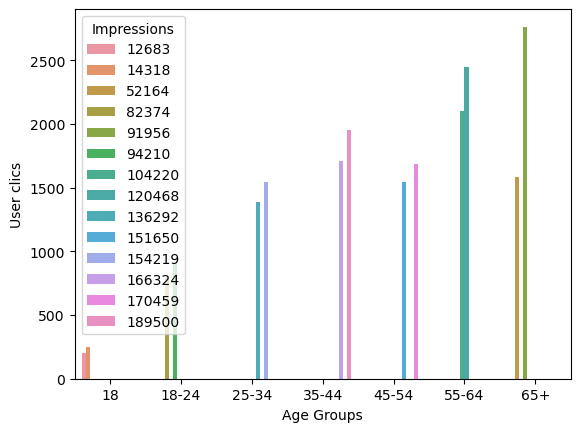

In [83]:
#Task 2.3
ax=sns.barplot(data=data_gender, 
            x=data_gender.AG, 
            y=data_gender.Clicks,
            hue=data_gender.Impressions)
ax.set(xlabel='Age Groups',ylabel='User clics')
data_gender.sort_values(["AG"])

Age_valueGroup=["18","18-24","25-34","35-44","45-54","55-64","65+"]
[data_check[data_check.AG==value].Impressions.mode() for value in Age_valueGroup]

In [94]:
#Task 3 and 4
def getResultForQuery(search: str, ageGroup: str, gender: int = 2):
    all_days = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    days = ["Вівторок", "Середа", "Четверг", "П'ятниця", "Субота", "Неділя", "Понеділок"]
    ##one_day=0;
    for i in range(0, 31):
        one_day = pd.read_csv("dateset/nyt/nyt" + str(i + 1) + ".csv")
        one_day_age = one_day[one_day.Age > 0]
        one_day_age.insert(1, "Age_Group", [age_group(age) for age in one_day_age.Age.to_list()])
        one_day = one_day_age[one_day_age.Age_Group == ageGroup][search].count()
        all_days[i % 7] += one_day
    for l, v in all_days.items():
        print("{0}|{1}".format(days[l % 7], v))
        
getResultForQuery("Impressions", "25-34", 1)

Вівторок|248628
Середа|246303
Четверг|257700
П'ятниця|203510
Субота|174356
Неділя|341779
Понеділок|201374
